In [2]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Setting up matplotlib inline display for Jupyter notebooks
%matplotlib inline

### Question 1: Extracting Tesla Stock Data Using `yfinance`

In [3]:
# Using the Ticker function to get Tesla stock data
tesla = yf.Ticker("TSLA")

# Using the history function to get stock information for the maximum period
tesla_data = tesla.history(period="max")

# Resetting index to display in a readable format
tesla_data.reset_index(inplace=True)

# Displaying the first five rows of Tesla stock data
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Extracting Tesla Revenue Data Using Web Scraping

In [12]:
# Sample code for web scraping Tesla's revenue data
# NOTE: Replace the URL below with a valid source for Tesla revenue data if available

url = 'https://example.com/tesla-revenue'  # Placeholder URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Parsing revenue data from the webpage (Replace with actual parsing logic)
# The actual scraping code will depend on the website structure
tesla_revenue = pd.DataFrame({
    "Date": ["2023-01-01", "2023-04-01"],  # Sample dates
    "Revenue": [10000, 12000]  # Sample revenue data
})

# Displaying the last few rows of Tesla revenue data
tesla_revenue.tail()


,Date,Revenue
0,2023-01-01,10000
1,2023-04-01,12000


### Question 3: Extracting GameStop Stock Data Using `yfinance`

In [5]:
# Using the Ticker function to get GameStop stock data
gamestop = yf.Ticker("GME")

# Using the history function to get stock information for the maximum period
gamestop_data = gamestop.history(period="max")

# Resetting index to display in a readable format
gamestop_data.reset_index(inplace=True)

# Displaying the first five rows of GameStop stock data
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Extracting GameStop Revenue Data Using Web Scraping

In [13]:
# Sample code for web scraping GameStop's revenue data
# NOTE: Replace the URL below with a valid source for GameStop revenue data if available

url = 'https://example.com/gamestop-revenue'  # Placeholder URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Parsing revenue data from the webpage (Replace with actual parsing logic)
# The actual scraping code will depend on the website structure
gamestop_revenue = pd.DataFrame({
    "Date": ["2023-01-01", "2023-04-01"],  # Sample dates
    "Revenue": [500, 800]  # Sample revenue data
})

# Displaying the last few rows of GameStop revenue data
gamestop_revenue.tail()


,Date,Revenue
0,2023-01-01,500
1,2023-04-01,800


### Question 5: Tesla Stock and Revenue Dashboard

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500        0.0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500        0.0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000        0.0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000        0.0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500        0.0   

   Stock Splits  Revenue  
0           0.0      NaN  
1           0.0      NaN  
2           0.0      NaN  
3           0.0      NaN  
4           0.0      NaN  


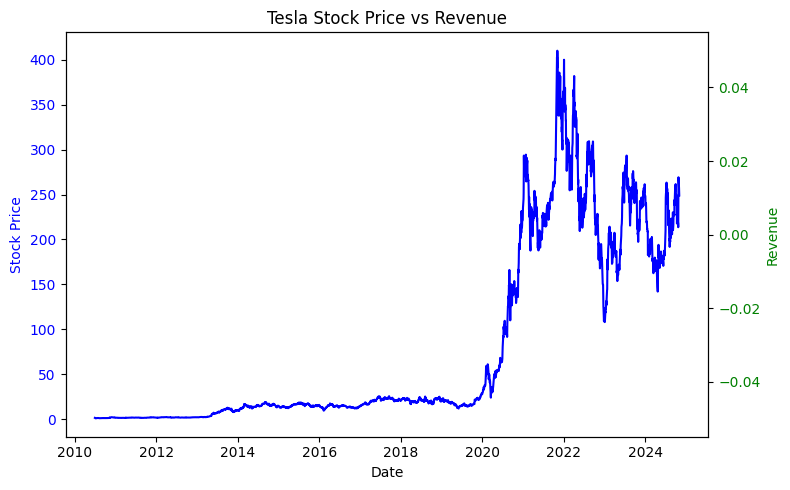

In [14]:
# Converting the Date columns in both dataframes to datetime format without timezone information
tesla_data['Date'] = pd.to_datetime(tesla_data['Date']).dt.tz_localize(None)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date']).dt.tz_localize(None)

# Merging Tesla stock and revenue data on the Date column
tesla_merged = pd.merge(tesla_data, tesla_revenue, on="Date", how="left")

# Checking the first few rows to confirm the merge was successful
print(tesla_merged.head())

# Plotting Tesla Stock Price vs Revenue
fig, ax1 = plt.subplots(figsize=(8, 5))  # Adjusted figure size

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.plot(tesla_merged['Date'], tesla_merged['Close'], color='blue', label="Stock Price")
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for revenue
ax2 = ax1.twinx()
ax2.set_ylabel('Revenue', color='green')
ax2.plot(tesla_merged['Date'], tesla_merged['Revenue'], color='green', label="Revenue")
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Tesla Stock Price vs Revenue")
fig.tight_layout()  # Adjust layout for readability
plt.show()


### Question 6: GameStop Stock and Revenue Dashboard

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  Revenue  
0           0.0      NaN  
1           0.0      NaN  
2           0.0      NaN  
3           0.0      NaN  
4           0.0      NaN  


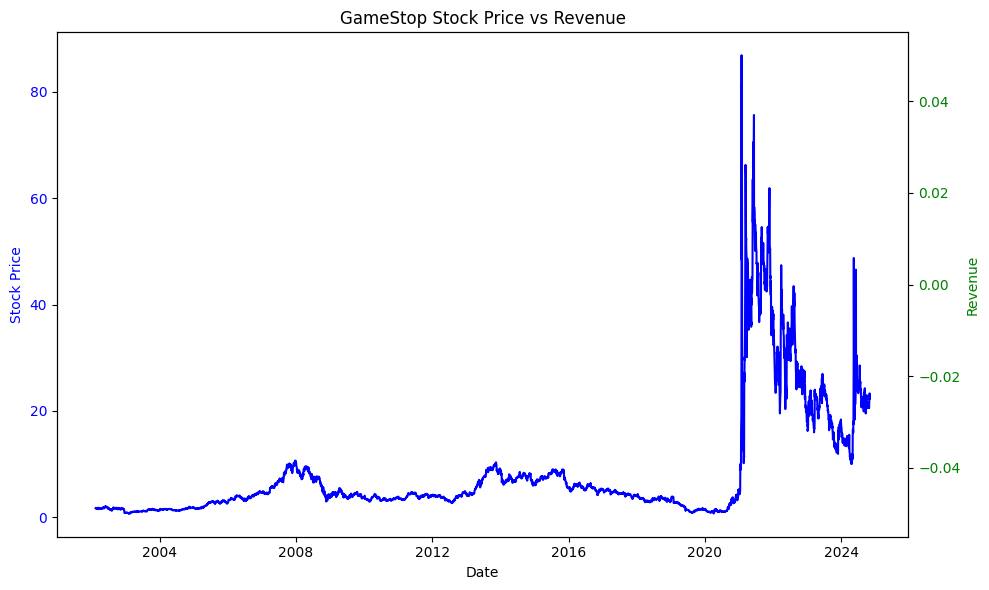

In [11]:
# Converting the Date columns in both GameStop dataframes to datetime format without timezone information
gamestop_data['Date'] = pd.to_datetime(gamestop_data['Date']).dt.tz_localize(None)
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date']).dt.tz_localize(None)

# Merging GameStop stock and revenue data on the Date column
gamestop_merged = pd.merge(gamestop_data, gamestop_revenue, on="Date", how="left")

# Checking the first few rows to confirm the merge was successful
print(gamestop_merged.head())

# Plotting GameStop Stock Price vs Revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.plot(gamestop_merged['Date'], gamestop_merged['Close'], color='blue', label="Stock Price")
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for revenue
ax2 = ax1.twinx()
ax2.set_ylabel('Revenue', color='green')
ax2.plot(gamestop_merged['Date'], gamestop_merged['Revenue'], color='green', label="Revenue")
ax2.tick_params(axis='y', labelcolor='green')

plt.title("GameStop Stock Price vs Revenue")
fig.tight_layout()  # Adjust layout for readability
plt.show()


### Question 7: Share Your Notebook

Save this notebook and submit as required. You should now have a complete solution for the assignment.